# 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

## Step 1. 사진 모으기

비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.  
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적  `장동건.jpg`,  `김태희.png`와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

**1. 내 사진 찍기**

-   내 사진을 2장 이상 포함합시다.
-   내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
-   혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

**2. 비교할 연예인 사진 모으기**

-   많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
-   주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

## Step 2. 얼굴 영역 자르기

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던  `get_gropped_face(image_file)`을 통해서 잘라줍시다! 자른 이미지는 PIL의  `Image.fromarray`를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.
<br></br>
```python
# 힌트  
# from PIL import Image  
# face = get_gropped_face(image_path)  
# pillow_image = Image.fromarray(face)  
# pillow_image.save(path_to_save)
```
<br></br>
## Step 3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를  `face_recognition`  을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

-   `def get_face_embedding(face)`  : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
-   `def get_face_embedding_dict(dir_path)`  : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

## Step 4. 모은 연예인들과 비교하기

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던  `get_nearest_face(name, top=5)`  함수들을 응용하면 손쉽게 수행 가능합니다.

## Step 5. 다양한 재미있는 시각화 시도해 보기

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.  
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.  
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎
***

## 1. 사진 모으기

[(76, 504, 461, 118)]
[[[ 98 132 177]
  [ 91 123 164]
  [ 73 102 146]
  ...
  [  2   7   1]
  [  1   6   0]
  [  3   8   2]]

 [[ 90 121 167]
  [ 81 112 156]
  [ 54  83 123]
  ...
  [  2   7   1]
  [  2   7   1]
  [  2   7   1]]

 [[ 81 114 159]
  [ 82 111 155]
  [ 50  78 118]
  ...
  [  1   6   0]
  [  2   7   1]
  [  3   8   2]]

 ...

 [[ 52  63  69]
  [ 19  32  40]
  [  3  13  22]
  ...
  [  3   5   0]
  [  3   5   0]
  [  3   5   0]]

 [[ 34  45  49]
  [ 17  27  29]
  [  2  13  15]
  ...
  [  3   5   0]
  [  3   5   0]
  [  3   5   0]]

 [[ 27  37  39]
  [ 17  28  32]
  [ 13  22  27]
  ...
  [  3   5   0]
  [  3   5   0]
  [  3   5   0]]]


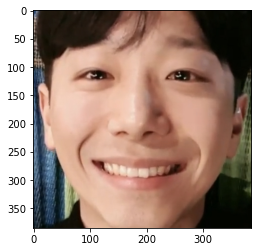

In [9]:
import face_recognition
import os

image_path = os.getenv('HOME') + '/face_embedding/images/박종함2.jpg'

image = face_recognition.load_image_file(image_path)

face_locations = face_recognition.face_locations(image)

# 이미지에서 얼굴 영역의 좌표 출력
print(face_locations)

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c, d:b]

# 이미지에서 얼굴 영역만 잘라낸 cropped_face 를 출력
print(cropped_face)
plt.imshow(cropped_face)

## 2. 얼굴 영역 자르기

In [10]:
# 얼굴 크롭해주는 함수 생성

import face_recognition

def get_cropped_face(image_file) : 
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a :c , d : b]
    
    return cropped_face

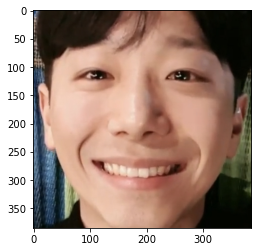

In [11]:
# 함수 실행

image_path = os.getenv("HOME") + '/face_embedding/images/박종함2.jpg'

cropped_face = get_cropped_face(image_path)

#print(cropped_face)
plt.imshow(cropped_face)

In [12]:
dir_path = os.getenv("HOME") + '/face_embedding/images'
file_list = os.listdir(dir_path)

print("file_list : \n{}".format(file_list))

file_list : 
['아이즈원민주.jpg', '성시경.jpg', '제프리 힌턴.jpg', '김구라.jpg', '길.jpg', '클린트 이스트우드.jpg', '제이크 질렌할.jpeg', '손호준.jpeg', '저스틴 존슨.jpeg', '이영하.jpg', '김종서.jpg', '방시혁.jpeg', '딕헌터.jpeg', '조정석.jpg', '윤경신.jpg', '이광수.jpg', '대도서관.jpeg', '이진호.jpeg', '씨잼.jpg', '오재원.jpg', '이명박.jpg', '김남주.jpeg', '류승범.jpg', '이대형.jpg', '손흥민.jpg', '박서준.jpeg', '슬기.jpg', '매드클라운.jpeg', '트와이스정연.jpg', '유노윤호.jpg', '이민호.jpeg', '진.jpg', '효정.jpg', '이동휘.jpg', '하현우.jpg', '문별.jpg', '류준열.jpg', '최준석.jpg', '정준하.jpg', '이효리.jpg', '이승환.jpg', '이연걸.jpeg', '차두리.jpeg', '켄 정.jpeg', '김광현.jpg', '이희준.jpg', '류현진.jpg', '박재범.jpg', '김연우.jpeg', '숀 코네리.jpg', '줄리엔강.png', '조승우.jpeg', '백윤식.png', '정우성.jpeg', '슬리피.jpg', '윤균상.jpg', '김현수.jpeg', '목진화.png', '잭 스페이더.jpeg', '정형돈.jpg', '아이린.jpeg', '박보검.jpg', '잭 니콜슨.jpeg', '로다주.jpeg', '신태용.jpg', '정수빈.jpg', '성룡.jpg', '김C.jpeg', '전소미.jpg', '뷔.png', '찬열.jpeg', '잭 블랙.jpeg', '민니.jpg', '주호민.jpeg', '서장훈.jpg', '아이유.jpg', '사쿠라.jpg', '이성민.jpg', '화사.jpg', '박명수.jpg', '김경진.png', '김민재.jpeg', '송중기.jpeg', '안재홍.jpg', '크리스 에반스.jpg',

In [13]:
# get_cropped_face(image_file) 을 통해 크롭
# PIL 의 Image.fromarray 를 통해 PIL Image 로 변환한 뒤 저장.
# - 힌 트 -
# from PIL import Image
# face = get_cropped_face(image_path)
# pillow_image = Image.fromarray(face)

from PIL import Image

face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
print(pillow_image)

<PIL.Image.Image image mode=RGB size=386x385 at 0x7F23D47AF490>


## 3. 얼굴 영역의 임베딩 추출하기

In [14]:
# 내 사진에 포함된 얼굴 영역 임베딩 벡터
image_file = os.path.join(dir_path, '박종함2.jpg')

# 사진에서 얼굴 영역 을 구하는 함수 정의
face = get_cropped_face(image_file)

# 얼굴 영역으로 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face) : 
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
print(embedding)

[array([-0.00373811,  0.05946172,  0.01709232, -0.02742805, -0.02555377,
       -0.02806679, -0.08230939, -0.11955005,  0.12394007, -0.06902554,
        0.20916547, -0.02283009, -0.1783184 , -0.16085023,  0.02399135,
        0.13273335, -0.1856216 , -0.1458675 , -0.01978128,  0.05345156,
        0.1093972 , -0.00818699,  0.0153979 , -0.01109619, -0.13162376,
       -0.31411839, -0.10111674, -0.08892544,  0.04312247, -0.03756921,
       -0.05330781,  0.03174541, -0.18233475, -0.02017017,  0.05508183,
        0.0717939 , -0.01768747, -0.02847357,  0.1845223 , -0.01195604,
       -0.28774536,  0.09330042,  0.03295726,  0.1901737 ,  0.19301465,
        0.00640377,  0.03563834, -0.15097708,  0.12913682, -0.10273263,
        0.06431343,  0.20813324,  0.13878393,  0.06802122,  0.0247653 ,
       -0.08584929,  0.0137819 ,  0.11837529, -0.14545155,  0.04940651,
        0.15170151, -0.01367747,  0.00391871, -0.08346149,  0.11562058,
        0.00562964, -0.14874683, -0.21606854,  0.03961378, -0.1

In [15]:
# 파일 안의 모든 이미지 파일을 임베딩해서
# 딕셔너리 구조에 담는 함수 생성
# 사람이름 : 임베딩 백터 로 구성됨

def get_face_embedding_dict(dir_path) : 
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list : 
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        
        if len(embedding) >  0 :
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [16]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['유희열']

array([-0.07462565,  0.11330558,  0.03732542, -0.00452947, -0.07769652,
        0.09356586, -0.08877393, -0.10431509,  0.17162849, -0.13579756,
        0.20044219,  0.00690927, -0.21789454, -0.01536767, -0.05808144,
        0.18199356, -0.16404915, -0.14370933, -0.01913659,  0.03075212,
        0.07465379, -0.00676817,  0.0015624 , -0.00689086, -0.11330111,
       -0.2770083 , -0.08904921, -0.04140559, -0.06987589, -0.05607943,
       -0.07621637,  0.00494945, -0.16759486, -0.00781154,  0.01869554,
        0.05163961, -0.04177396, -0.00369871,  0.19305733,  0.03735889,
       -0.21645196,  0.11239527,  0.02149116,  0.24960725,  0.19500586,
        0.02602113, -0.04786362, -0.13838771,  0.14531492, -0.19214286,
        0.03341445,  0.20266429,  0.10810784,  0.04867171,  0.02329961,
       -0.09632193,  0.0253046 ,  0.08620659, -0.07477649,  0.03649901,
        0.08723822, -0.01845343, -0.00953023, -0.10013121,  0.13302737,
        0.06024492, -0.09143067, -0.24301854,  0.06560253, -0.08

In [17]:
# 얼굴 임베딩 사이의 거리 측정

# 임의의 사진을 가져와 임베딩 벡터로 추출,
# a, b, c 에 각 임베딩 벡터 값을 입력
# 모델을 구분할 수 있도록 학습을 통해 임베딩 간 거리가 확보되었는지 확인

import numpy as np

A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])

B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])

C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

In [18]:
# numpy.linalg.norm 을 통해서 L2 Norm Distance 로 계산
# 거리가 멀 수록 다른 사람이며, 가까울 수록 같은 사람일 확률이 높다

distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815


In [19]:
# L2 distance 대신 L1 거리로 계산한다면?
# 전체적인 distance 값의 분포가 커진다. 

distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363


In [20]:
# 위의 거리 계산 방식이 헷갈린다면 이 코드를 확인!

import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In [21]:
# 가지고 있는 이미지를 통해서 벡터 간 거리를 계산하는 함수를 생성
# np.linalg.norm 을 활용.

# 인자로 파일명의 사람이름 2개를 받아, 두 사람의 얼굴 임베딩 사이의 거리를 구하는 형태

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('박종함2', '유희열')

0.4960761389841242

In [22]:
# name1과 name2의 거리를 비교하는 함수를 생성하되,
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('유희열')   
# 이렇게 생성된 함수 sort_key_func는 
# sort_key_func('obama') 라고 호출할 때 
# trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [23]:
# 이미 가지고 있는 이미지 파일에 대한 얼굴 임베딩 딕셔너리를
# 오름차순 정렬하되, 정렬 기준을 바로 trump 와의 임베딩 벡터 거리를 함수로한다.
# 이때 lambda 함수가 정렬 key 로 활용된다.

3sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('유희열',
  array([-0.07462565,  0.11330558,  0.03732542, -0.00452947, -0.07769652,
          0.09356586, -0.08877393, -0.10431509,  0.17162849, -0.13579756,
          0.20044219,  0.00690927, -0.21789454, -0.01536767, -0.05808144,
          0.18199356, -0.16404915, -0.14370933, -0.01913659,  0.03075212,
          0.07465379, -0.00676817,  0.0015624 , -0.00689086, -0.11330111,
         -0.2770083 , -0.08904921, -0.04140559, -0.06987589, -0.05607943,
         -0.07621637,  0.00494945, -0.16759486, -0.00781154,  0.01869554,
          0.05163961, -0.04177396, -0.00369871,  0.19305733,  0.03735889,
         -0.21645196,  0.11239527,  0.02149116,  0.24960725,  0.19500586,
          0.02602113, -0.04786362, -0.13838771,  0.14531492, -0.19214286,
          0.03341445,  0.20266429,  0.10810784,  0.04867171,  0.02329961,
         -0.09632193,  0.0253046 ,  0.08620659, -0.07477649,  0.03649901,
          0.08723822, -0.01845343, -0.00953023, -0.10013121,  0.13302737,
          0.06024492, -0.0914

## 4. 모은 연예인들과 비교하기

In [24]:
# 임베딩 거리를 정렬해서 출력해주는 함수를 생성

def get_nearest_face(name, top = 10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key = lambda x:sort_key_func(x[0]))

    for i in range(top + 1):
        
        # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
        if i == 0 :    
            continue
            
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
# 가장 닮은 사람은 누굴까요?

get_nearest_face('박종함2')

순위 1 : 이름(박종함1), 거리(0.3962763174486482)
순위 2 : 이름(영알남), 거리(0.4312980178573357)
순위 3 : 이름(박건우), 거리(0.4443993409067679)
순위 4 : 이름(김광현), 거리(0.4503875292351292)
순위 5 : 이름(이종석), 거리(0.45706309139260076)
순위 6 : 이름(목진화), 거리(0.4587044359638591)
순위 7 : 이름(하현우), 거리(0.46618165127589134)
순위 8 : 이름(서강준), 거리(0.46705210847667017)
순위 9 : 이름(카이), 거리(0.4672917780659271)
순위 10 : 이름(첸), 거리(0.46731155378342576)


## 5. 다양한 재미있는 시각화 시도해 보기

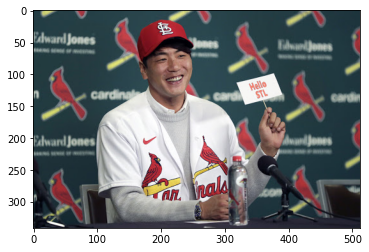

In [29]:
import matplotlib.image as img

img_path = os.getenv("HOME") + '/face_embedding/images/김광현.jpg'
img_file = img.imread(img_path)
plt.imshow(img_file)